In [ ]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape

(50000, 32, 32, 3)

In [ ]:
X = X_train
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])
X.shape

(50000, 3072)

In [ ]:
from matplotlib import pyplot as plt

def plotImage(X):
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(X.reshape(32,32,3))
    plt.show()
    plt.close()

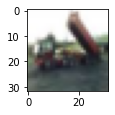

In [ ]:
plotImage(X[2,:])

In [ ]:
X_norm = X / 255.
print ('X.min()', X_norm.min())
print ('X.max()', X_norm.max())

X.min() 0.0
X.max() 1.0


In [ ]:
X_norm.mean(axis=0).shape


(3072,)

In [ ]:
X_norm.mean(axis=0)


array([0.51259114, 0.53355349, 0.51981882, ..., 0.49662384, 0.49353059,
       0.44855631])

In [ ]:

X_norm = X_norm - X_norm.mean(axis=0)
X_norm.mean(axis=0)


array([-2.42310394e-15,  1.57485580e-14, -3.23218119e-15, ...,
       -6.93265223e-15, -4.80754658e-15, -2.95369551e-14])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


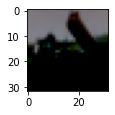

In [ ]:
plotImage(X_norm[2,:])

In [ ]:
import numpy as np

cov = np.cov(X_norm, rowvar=False)


In [ ]:
U,S,V = np.linalg.svd(cov)


In [ ]:
epsilon = 0.1
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X_norm.T).T

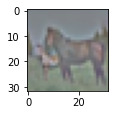

In [ ]:
X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())

plotImage(X_ZCA_rescaled[12,:])

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive',force_remount=True)
os.chdir("/content/drive/My Drive/CIFAR")

Mounted at /content/drive


In [ ]:
from PIL import Image
def rescale(arr):
    arr_min = arr.min()
    arr_max = arr.max()
    return (arr - arr_min) / (arr_max - arr_min)



def saveImage(X,i):
  
  X = X.reshape(32,32,3)
  rescale(X)
  X[:,:,0] = 255* rescale(X[:,:,0])
  X[:,:,1] = 255* rescale(X[:,:,1])
  X[:,:,2] = 255* rescale(X[:,:,2])

  img = Image.fromarray(X.astype(int), 'RGB')
  img.save(str(i)+'.png')


In [ ]:
for i in range(0,len(X_ZCA_rescaled)):
  saveImage(X_ZCA_rescaled[i,:],i)

KeyboardInterrupt: ignored